# Исследование объявлений о продаже квартир

Проанализируем архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель - научиться определять рыночную стоимость объектов недвижимости. Необходимо установить параметры, что позволит построить автоматизированную систему отслеживания аномалий и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.info())
display(data.shape)
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

(23699, 22)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Выводы.** Изучив данные мы видим, что датафрейм состоит из 23699 строк, 22 столбцов. Талица очень громоздкая, некоторые столбцы не нужны для ответов на поставленные вопросы. Отдельные столбцы содержат нулевые значения, где-то их больше половины. Столбец first_day_exposition содержит сведения о времени и дате, но имеет формат данных object, время везде нулевое, для исследований не понадобится.

## Предобработка данных

In [2]:
# Удалим столбцы, которые не понадобятся для анализа данных
data.drop(['total_images', 'is_apartment', 'studio', 'open_plan', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis = 1, inplace = True)

# Посчитаем количество дубликатов набором методов data.duplicated().sum().
display(data.duplicated().sum())

# Удалим строки, где отсутствует информация о количестве этажей в доме.
# Таких строк не много, удаление существено не повлияет на результат.
data.dropna(subset = ['floors_total'], inplace = True)

# Заполним нулевые значения в столбцах balcony, parks_around3000, ponds_around3000 значениями 0, 
# т.к., скорее всего, там нет балконов, парков и водоемов.
data['balcony'] = data['balcony'].fillna(0)

# Заполним нулевые значения в столбце cityCenters_nearest медианным значением по данному столбцу.
# Удалять строки с пустыми значениями в данном столбце нельзя, т.к. их слишком много.
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

# Изменим формат данных для столбца first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Переведем значения столбцов last_price, floors_total, balcony в целые числа
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

# Проверим, что получилось, распечатав информацию о талице и первые 5 строк таблицы.
data.info()
data.head()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null int64
living_area             21743 non-null float64
floor                   23613 non-null int64
kitchen_area            21382 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
cityCenters_nearest     23613 non-null float64
days_exposition         20441 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 2.5+ MB


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN
1,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0
3,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,0,Санкт-Петербург,6800.0,424.0
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0


In [3]:
# Заполним нулевые значения в столбцах living_area и kitchen_area в зависимости от количества комнат в квартире
for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'living_area'].median()
    data.loc[(data['rooms'] == rooms) & (data['living_area'].isna()), 'living_area'] = median

    median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
    data.loc[(data['rooms'] == rooms) & (data['kitchen_area'].isna()), 'kitchen_area'] = median
    
data.info()
data.head()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
kitchen_area            23419 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
cityCenters_nearest     23613 non-null float64
days_exposition         20441 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 2.5+ MB


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN
1,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0
3,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,0,Санкт-Петербург,6800.0,424.0
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0


**Выводы.** Дубликатов нет. Столбцы с данными, не нужными для анализа, удалили, чтобы не загромождать таблицу. Мы заполнили нулевые значения различными способами, в зависимости от количества нулевых значений и смысла содержащихся в столбце данных. Отдельно заполнили нулевые значения в столбцах, содержащих информацию о жилой площади и площади кухни: поставили медианные значения в зависимости от количества комнат в квартире, чтобы расчеты были более точными.
Для дальнейшего анализа поменяли формат данных в столбце first_day_exposition на datetime64[ns]. Для удобства восприятия значения в отдельных стобцах перевели в целые числа. Теперь данные готовы для анализа.

## Рассчёты и добавление результатов в таблицу

In [4]:
# Посчитаем и добавим в таблицу необходимые соотношения
data['price_per_meter'] = data['last_price'] / data['total_area']
data['part_living_total'] = data['living_area'] / data['total_area']
data['part_kitchen_total'] = data['kitchen_area'] / data['total_area']

# Извлечем день недели, месяц и год и добавим колонки в таблицу
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Сформируем дополнительный столбец с данными о типе этажа (1 - первый, 3 - последний, 2 - другой)
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 1
    if floor == floors_total:
        return 3
    return 2
data['floor_type'] = data.apply(floor_type, axis=1)

data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,price_per_meter,part_living_total,part_kitchen_total,weekday,month,year,floor_type
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,2
1,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0,82920.792079,0.460396,0.272277,1,12,2018,1
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,2
3,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,0,Санкт-Петербург,6800.0,424.0,408176.100629,0.283019,0.059748,4,7,2015,2
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,2


**Выводы.** Мы добавили в таблицу столбцы, которые понадобятся для дальнейшего анализа данных.

## Исследовательский анализ данных

0.9590479820437895
0.9753949095837039
0.9961885402109008
0.6090289247448439


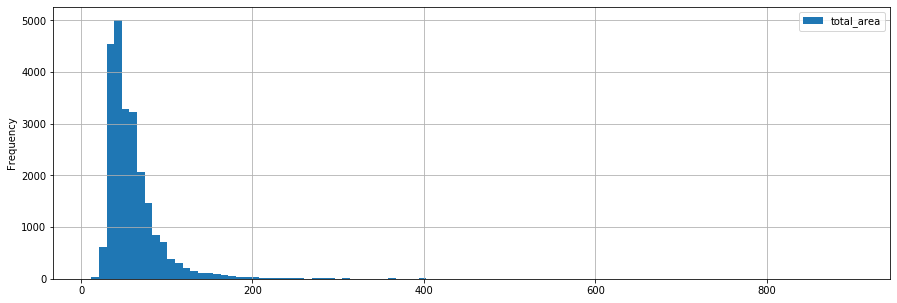

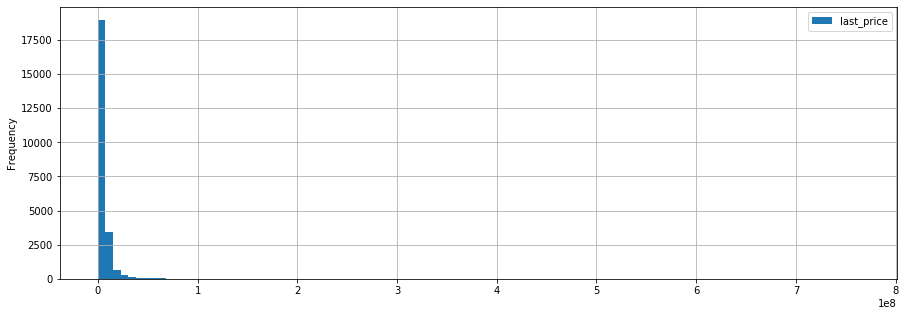

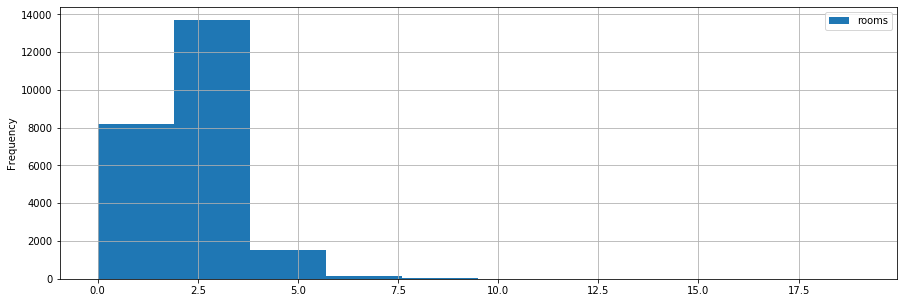

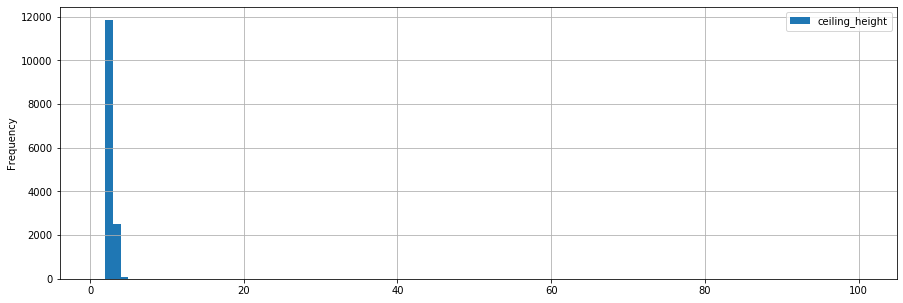

In [5]:
# Построим гистрограммы для параметров: площадь, цена, число комнат, высота потолков
data.plot(kind='hist', y='total_area', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='last_price', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='rooms', bins=10, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='ceiling_height', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

print(len(data.query('last_price < 17000000')) / len(data))
print(len(data.query('total_area < 150')) / len(data))
print(len(data.query('rooms < 7')) / len(data))
print(len(data.query('ceiling_height < 4')) / len(data))

**Промежуточные выводы.** Построим графики без использования параметра range. Мы видим, что общая площадь квартир доходит до 1000 кв. м, однако квартир площадью свыше 150 кв.м незначительное количество. По цене квартир есть отдельные выбросы, однако квартиры больше 17 млн. руб. для анализа не интересны, количество комнат доходит до 18, однако для анализа ограничимся квартирами до 7 комнат, высоту потолков оставим максимально 4 метра.

0.9590479820437895
0.9753949095837039
0.9961885402109008
0.6090289247448439


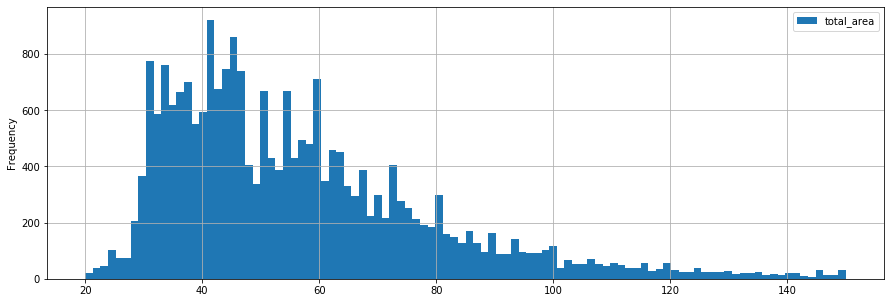

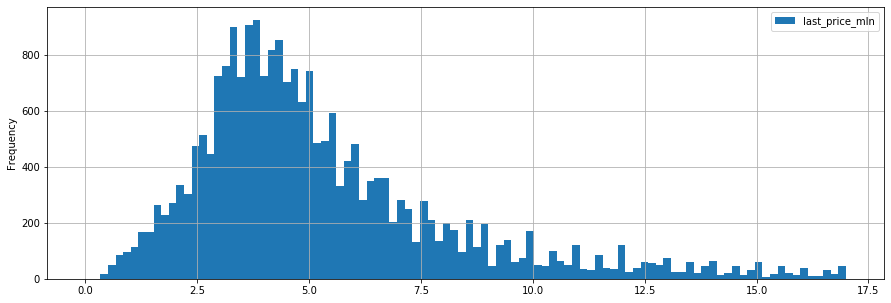

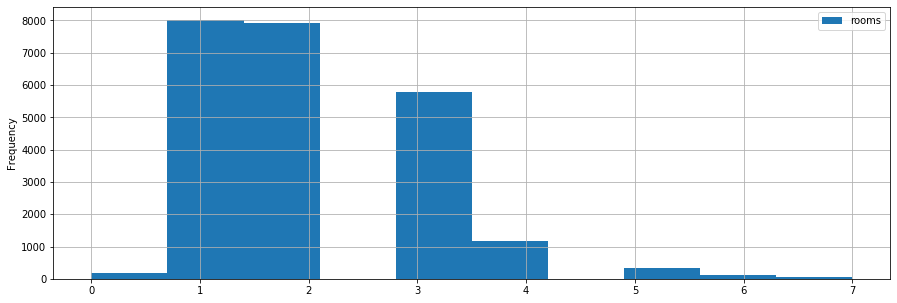

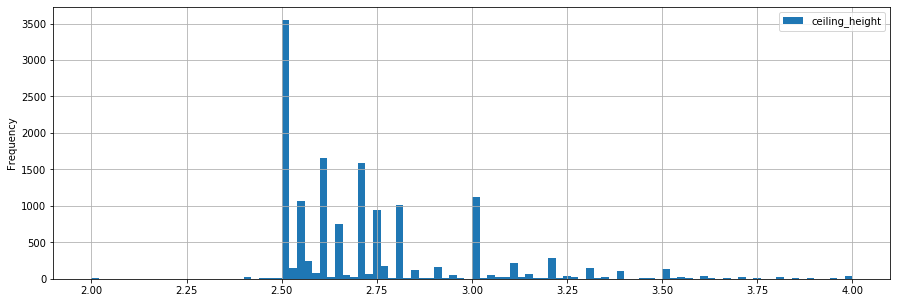

In [6]:
# Для удобства анализа передем цену квартир в млн. руб.
data['last_price_mln'] = data['last_price'] / 1000000

# Построим гистрограммы для параметров: площадь, цена, число комнат, высота потолков с использованием параметра range
data.plot(kind='hist', y='total_area', range=(20, 150), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='last_price_mln', range=(0, 17), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='rooms', range=(0, 7), bins=10, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='ceiling_height', range=(2, 4), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

# Посчитаем какую часть строк мы взяли для анализа указанных параметров
print(len(data.query('last_price < 17000000')) / len(data))
print(len(data.query('total_area < 150')) / len(data))
print(len(data.query('rooms < 7')) / len(data))
print(len(data.query('ceiling_height < 4')) / len(data))

**Выводы.** Больше всего квартир продатся с площадью 30-70 кв.м. Квартиры площадью в несколько сотен кв.м являются большой редкостью или ошибкой выгрузки данных. Наиболее резкое падение плошади квартир наблюдается после 100 кв.м. 
Чаще всего продаются квартиры в ценовом диапазоне от 3 до 5 млн. руб. Квартиры стоимостью свыше 10 млн. руб. продаются редко.
Самыми популярными по числу комнат являются "однушки" и "двушки", их продавалось около 8000 каждого вида. На втрором месте идут "трёшки". Квартиры с количеством комнат больше семи являются большой редкостью.
На гистограмме высоты потолков мы видим, что этот параметр достаточно стандартизирован. Самые популярные квартиры с высотой потолков около 2,5 м. Мы отбросили около 40% квартир для анализа высоты потолков, но, как мы помним, по этому параметру задано много нулевых значений. По остальным параметрам принятые нами ограничения существенно не повлияли на конечный результат.

180.88483929357665

95.0

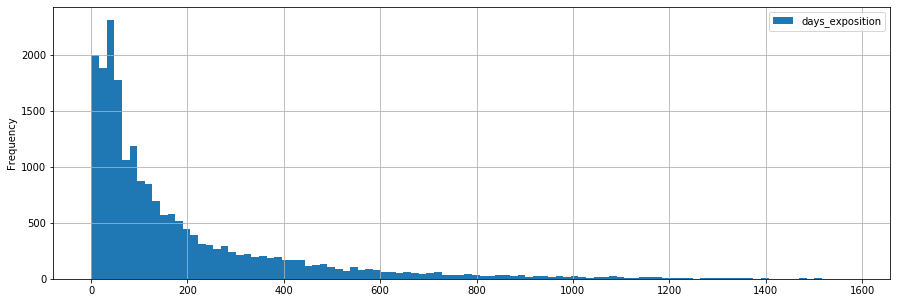

In [7]:
# Изучим время продажи квартиры, построим гистограмму, посчитаем среднее и медиану. 

data.plot(kind='hist', y='days_exposition', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
display(data['days_exposition'].mean())
display(data['days_exposition'].median())

0.7364163808071825


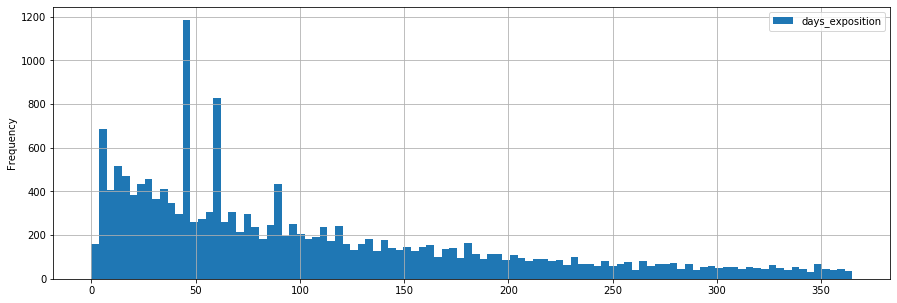

In [8]:
print(len(data.query('days_exposition < 365')) / len(data))

data.plot(kind='hist', y='days_exposition', range=(0, 365), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

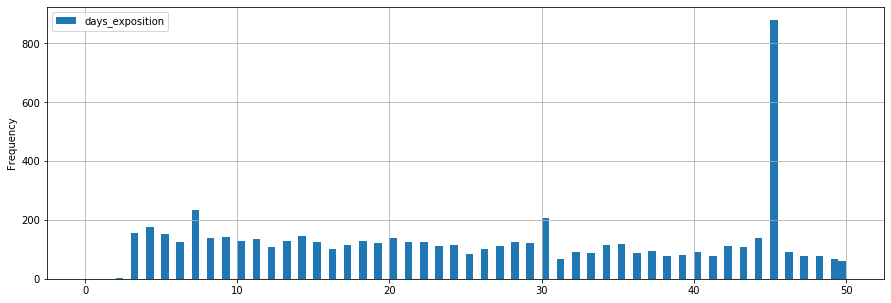

In [9]:
data.plot(kind='hist', y='days_exposition', range=(0, 50), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

**Выводы.** Мы построили диаграммы с разным количеством "корзин", чтобы более наглядно получить ответ на поставленный вопрос. Всё что продается больше года не представлет существенного интереса для анализа, таких квартир очень мало.
По гистограмме мы видим, что больще всего квартир продается в течение двух месяцев. Есть и аномальные сроки продажи - около 5 лет. Возможно, это ошибки в данных, которые существенно повлияли на среднюю арифметическую срока продажи квартир - полгода.
Более показательным в данном случае является значение медианы - 3 месяца. Интересно, что больше всего квартир удалось продать именно через полтора месяца после публикации объявления.


Можно сделать вывод, что если квартира продалась в первый месяц, это хороший результат, если прошло более двух месяцев, то продавцам, скорее всего, стоит пересмотреть цену объекта.

In [10]:
# Попробуем понять, какие факторы больше всего влияют на стоимость квартиры
display(data['last_price'].corr(data['total_area']))
display(data['last_price'].corr(data['rooms']))
display(data['last_price'].corr(data['floor_type']))
display(data['last_price'].corr(data['cityCenters_nearest']))
display(data['last_price'].corr(data['weekday']))
display(data['last_price'].corr(data['month']))
display(data['last_price'].corr(data['year']))

0.6535810085611219

0.36312416659845514

0.05887556532281145

-0.19051092587721635

0.0012947242289498373

0.002765232657488408

-0.04302312009925655

**Выводы.** Конечно же, больше всего на цену влияет площадь продаваемой квартиры, а также количество комнат. Существенного влияния типа этажа на цену мы не видим, однако данный вопрос требует более глубокого изучения: сильно снижает стоимость квартиры именно первый этаж, а не последний.

Очевидна обратно пропорциональная зависимость цены квартиры от удаленности от центра: чем больше расстояние от центра, тем меньше стоимость квартиры.

День недели, месяц и год размещения объявления о продаже квартиры влияния на цену не оказывают.

In [11]:
data.corr()['last_price'].reset_index()

,index,last_price
0,last_price,1.000000
1,total_area,0.653581
2,rooms,0.363124
3,ceiling_height,0.085435
4,floors_total,-0.006984
5,living_area,0.556011
6,floor,0.026644
7,kitchen_area,0.453906
8,balcony,0.008598
9,cityCenters_nearest,-0.190511


In [12]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений. 
# Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
# Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

data_new = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
data_new.columns = ['mean', 'count'] 
data_new.sort_values('count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,114868.877341,15651
посёлок Мурино,85673.259928,520
посёлок Шушары,78551.344545,439
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
посёлок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


**Выводы.** Итак, из 10 населенных пунктов с наибольшим количеством объявлений, самая высокая средняя стоимость квадратного метра жилья, конечно же, в Санкт-Петербурге, самая низкая - в Выборге.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


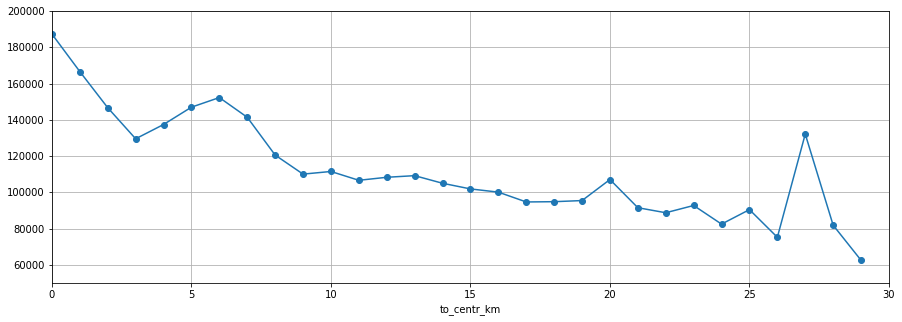

In [13]:
# Выделим квартиры в Санкт-Петербурге
# Создадим столбец с расстоянием до центра в километрах, округлим до целых значений
flats_SPB = data[data['locality_name'] == 'Санкт-Петербург']
flats_SPB['to_centr_km'] = (flats_SPB['cityCenters_nearest'] / 1000).astype('int')
flats_SPB.head()

# Посчитаем среднюю цену для каждого километра
price_per_meter_mean = flats_SPB.groupby('to_centr_km')['price_per_meter'].mean()

# Построим график зависимости цены квартиры от удаленности от центра города
price_per_meter_mean.plot(x='to_centr_km', y='price_per_meter', style='o-', xlim=(0, 30), ylim=(50000, 200000), figsize=(15, 5), grid=True)

**Выводы.** Из графика можно сделать вывод о том, что центральная зона находится в радиусе восьми километров от центра.

0.9892497712717292
0.932067703568161
0.9945105215004575
0.6525617566331199


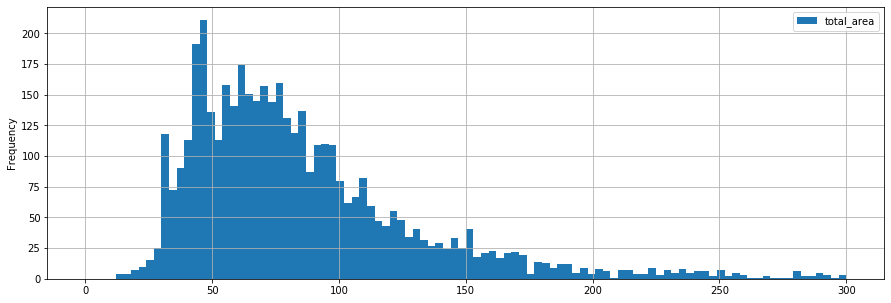

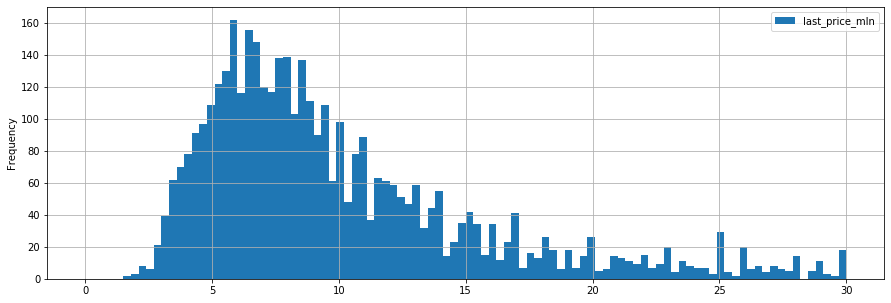

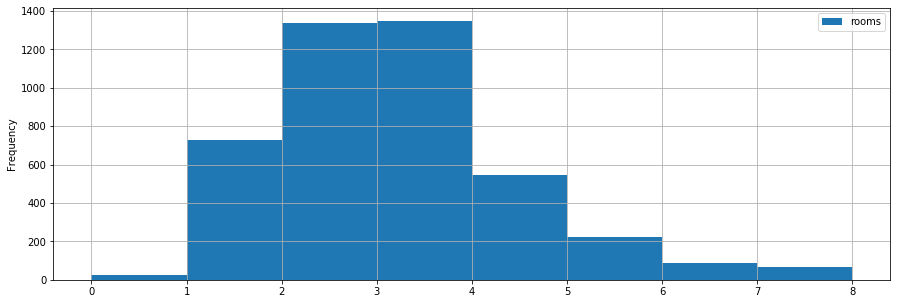

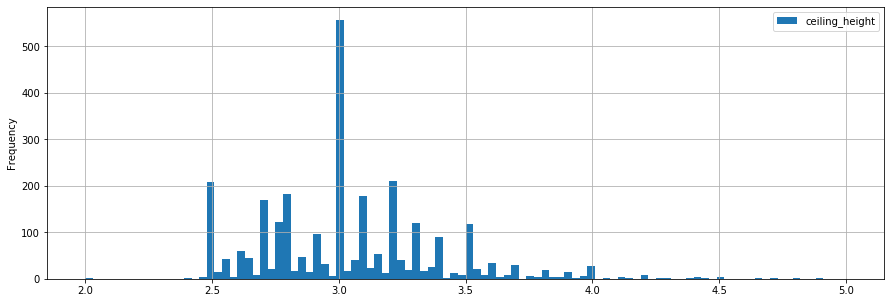

In [14]:
# Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: 
# площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры 
# (число комнат, этаж, удалённость от центра, дата размещения объявления). 

flats_SPB_centr = flats_SPB[flats_SPB['to_centr_km']<=8]
#flats_SPB_centr.head()

print(len(flats_SPB_centr.query('total_area < 300')) / len(flats_SPB_centr))
print(len(flats_SPB_centr.query('last_price_mln < 30')) / len(flats_SPB_centr))
print(len(flats_SPB_centr.query('rooms < 8')) / len(flats_SPB_centr))
print(len(flats_SPB_centr.query('ceiling_height < 5')) / len(flats_SPB_centr))

flats_SPB_centr.plot(kind='hist', y='total_area', range=(0, 300), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
flats_SPB_centr.plot(kind='hist', y='last_price_mln', range=(0, 30), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
flats_SPB_centr.plot(kind='hist', y='rooms', range=(0, 8), bins=8, alpha=1, grid=True, legend=True, figsize=(15,5))
flats_SPB_centr.plot(kind='hist', y='ceiling_height', range=(2, 5), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

**Выводы.** Мы видим, что в центре города вправо смещается диапазон площади продаваемых квартир:больше всего квартир продатся с площадью 40-100 кв.м. Наиболее резкое падение плошади квартир наблюдается после 200 кв.м. 
Квартиры в центре стоят дороже, чаще всего продаются квартиры в ценовом диапазоне от 3 до 14 млн. руб. Немало квартир стоиостью от 20 до 30 млн. руб.

Самыми популярными по числу комнат являются уже "двушки" и "трешки", "однушки" переместились на второе место. Немало продается и четырехкомнатных квартир - более 500.
На гистограмме высоты потолков мы видим, что в центре абсолютное лидеоство занимают квартиры с высотой потолков в 3 метра. Очевидно, что в центральной части города больше всего домов дореволюционной постройки.

In [15]:
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['total_area']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['rooms']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['floor_type']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['cityCenters_nearest']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['weekday']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['month']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['year']))

0.6411725061469974

0.3450224274581447

0.09878285750153576

-0.10026105084964257

0.019812850755545355

-0.0035339430539036683

-0.048747963325269254

**Выводы.** Как и ранее мы видим, что больше всего на цену влияет площадь продаваемой квартиры, а также количество комнат. Заметно выросло влияние типа этажа на цену. Можно предположить, что в центре много туристов, автомобильный трафик значительно выше, что делает жизнь на первом этаже менее комфортной.

Зависимость цены квартиры от удаленности от центра снизилась. Оно и понятно, это и есть центр.

День недели, месяц и год размещения объявления о продаже квартиры по прежнему влияния на цену не оказывают.

## Общий вывод

Мы провели исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Предоставленный для анализа данные содержали ряд существенных недостатков, которые удалось устранить.

Мы посчитали отдельные важные показатели, необходимые нам для анализа: цена квадратного метра, доли жилой площади и площади кухни в общей площади квартиры. Для проведения дальнейшего анализа определили, какие квартиры находятся на первом этаже, какие на последнем, а какие на других этажах. Выделили день недели, месяц и год из даты размещения объявления о продаже квартиры.

В среднем квартиры продаются 1,5-3 месяца. Если за это время покупатель не нашелся, то продавцам стоит пересмотреть цену квартиры в сторону понижения.

Из 10 населенных пунктов с наибольшим количеством объявлений, самая высокая средняя стоимость квадратного метра жилья в Санкт-Петербурге, самая низкая - в Выборге.

Далее мы проанализировали такие параметры , как цена квартиры, общая площадь, количество комнат и высота потолков для всех квартир и для квартир в центре Санкт-Петербурга. В результате пришли к выводу, что квартиры в центре города имеют в среднем большую площадь, стоят дороже, имеют больше комнат, потолки в центре города выше. 

Инетерсно было сравнить, как отдельные факторы влияют на стоимость всех изучаемых квартир и квартир в центре Санкт-Петербурга. В обоих случаях, на цену квартиры влияют ее площадь и количество комнат. Тип этажа, на котором расположена квартира более существенное влияние на цену оказывает в центре города. Чем квартира дальше от центра, тем она дешевле, а вот день недели, месяц и год размещения объявления о продаже квартиры влияния на цену не оказывают.